# 1. Ingeniaría del dato


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.wkt import loads
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.options.display.max_columns = None

In [ ]:
mad = pd.read_csv("Msales.csv")
mad

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
0,A15019136831406238029,201803,126000,2680.851064,HOME,SALE,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.0,1.0,1.0,2005,7,319,3.0,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,Madrid,HOME,SALE
1,A6677225905472065344,201803,235000,4351.851852,HOME,SALE,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.0,2.0,1900,5,11,3.0,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,Madrid,HOME,SALE
2,A13341979748618524775,201803,373000,4973.333333,HOME,SALE,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.0,1.0,1915,6,26,3.0,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,Madrid,HOME,SALE
3,A4775182175615276542,201803,284000,5916.666667,HOME,SALE,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,2.0,1947,9,15,5.0,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,Madrid,HOME,SALE
4,A2492087730711701973,201803,228000,4560.000000,HOME,SALE,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.0,0.0,1.0,1930,5,19,7.0,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,Madrid,HOME,SALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,A3962186799478940177,201812,347000,3017.391304,HOME,SALE,115,3,2,1,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,1.0,1.0,2009,7,58,3.0,0,0,1,10.003059,0.866826,8.276950,-3.592154,40.445810,Madrid,HOME,SALE
94811,A3876164367053781729,201812,311000,3344.086022,HOME,SALE,93,2,2,0,1,1,3,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,2007.0,2.0,1.0,2007,7,161,3.0,0,0,1,10.198147,1.019788,8.496364,-3.589376,40.445013,Madrid,HOME,SALE
94812,A17768295786772492698,201803,342000,2826.446281,HOME,SALE,121,2,2,1,1,1,2,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,2005.0,3.0,1.0,2009,6,107,3.0,0,0,1,11.204027,1.883650,9.573127,-3.576271,40.443196,Madrid,HOME,SALE
94813,A15733144649359668635,201806,146000,2354.838710,HOME,SALE,62,3,1,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1970.0,3.0,2.0,1970,4,17,5.0,0,0,1,8.780692,0.171736,6.941217,-3.608694,40.447931,Madrid,HOME,SALE


In [ ]:
bar = pd.read_csv("Mpols.csv")
bar

,LOCATIONID,LOCATIONNAME,WKT,ZONELEVELID
0,0-EU-ES-28-07-001-079-16-002,Conde Orgaz-Piovera,"MULTIPOLYGON(((-3.63014 40.449394,-3.62633 40....",8
1,0-EU-ES-28-07-001-079-16-004,Pinar del Rey,"MULTIPOLYGON(((-3.655102 40.466807,-3.654251 4...",8
2,0-EU-ES-28-07-001-079-21-004,Timón,"MULTIPOLYGON(((-3.581744 40.479725,-3.60157 40...",8
3,0-EU-ES-28-07-001-079-01-001,Palacio,"MULTIPOLYGON(((-3.72044 40.42028,-3.72097 40.4...",8
4,0-EU-ES-28-07-001-079-01-003,Huertas-Cortes,"MULTIPOLYGON(((-3.696488 40.418813,-3.699685 4...",8
...,...,...,...,...
130,0-EU-ES-28-07-001-079-08-002,Fuentelarreina,"MULTIPOLYGON(((-3.733892 40.489401,-3.733132 4...",8
131,0-EU-ES-28-07-001-079-08-003,Peñagrande,"MULTIPOLYGON(((-3.726137 40.485498,-3.727173 4...",8
132,0-EU-ES-28-07-001-079-10-001,Los Cármenes,"MULTIPOLYGON(((-3.722623 40.404572,-3.722593 4...",8
133,0-EU-ES-28-07-001-079-09-001,Casa de Campo,"MULTIPOLYGON(((-3.770762 40.444122,-3.770713 4...",8


In [ ]:
mad["LONGITUDE"] = pd.to_numeric(mad["LONGITUDE"], errors="coerce")
mad["LATITUDE"] = pd.to_numeric(mad["LATITUDE"], errors="coerce")

def get_bounds(polygon_wkt):
    polygon = loads(polygon_wkt)
    minx, miny, maxx, maxy = polygon.bounds
    return minx, miny, maxx, maxy

bar["min_long"], bar["min_lat"], bar["max_long"], bar["max_lat"] = zip(*bar["WKT"].apply(get_bounds))

def find_barrio(lon, lat, bar_df):
    match = bar_df[(bar_df["min_long"] <= lon) & (bar_df["max_long"] >= lon) &
                   (bar_df["min_lat"] <= lat) & (bar_df["max_lat"] >= lat)]
    return match["LOCATIONNAME"].values[0] if not match.empty else np.nan

mad["BARRIO"] = mad.apply(lambda row: find_barrio(row["LONGITUDE"], row["LATITUDE"], bar), axis=1)

In [ ]:
mad

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION,BARRIO
0,A15019136831406238029,201803,126000,2680.851064,HOME,SALE,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.0,1.0,1.0,2005,7,319,3.0,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,Madrid,HOME,SALE,Cuatro Vientos
1,A6677225905472065344,201803,235000,4351.851852,HOME,SALE,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.0,2.0,1900,5,11,3.0,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,Madrid,HOME,SALE,Palacio
2,A13341979748618524775,201803,373000,4973.333333,HOME,SALE,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.0,1.0,1915,6,26,3.0,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,Madrid,HOME,SALE,Palacio
3,A4775182175615276542,201803,284000,5916.666667,HOME,SALE,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,2.0,1947,9,15,5.0,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,Madrid,HOME,SALE,Palacio
4,A2492087730711701973,201803,228000,4560.000000,HOME,SALE,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.0,0.0,1.0,1930,5,19,7.0,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,Madrid,HOME,SALE,Palacio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,A3962186799478940177,201812,347000,3017.391304,HOME,SALE,115,3,2,1,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,1.0,1.0,2009,7,58,3.0,0,0,1,10.003059,0.866826,8.276950,-3.592154,40.445810,Madrid,HOME,SALE,Rosas
94811,A3876164367053781729,201812,311000,3344.086022,HOME,SALE,93,2,2,0,1,1,3,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,2007.0,2.0,1.0,2007,7,161,3.0,0,0,1,10.198147,1.019788,8.496364,-3.589376,40.445013,Madrid,HOME,SALE,Rosas
94812,A17768295786772492698,201803,342000,2826.446281,HOME,SALE,121,2,2,1,1,1,2,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,2005.0,3.0,1.0,2009,6,107,3.0,0,0,1,11.204027,1.883650,9.573127,-3.576271,40.443196,Madrid,HOME,SALE,Rosas
94813,A15733144649359668635,201806,146000,2354.838710,HOME,SALE,62,3,1,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1970.0,3.0,2.0,1970,4,17,5.0,0,0,1,8.780692,0.171736,6.941217,-3.608694,40.447931,Madrid,HOME,SALE,Rosas


In [ ]:
pre = pd.read_csv("Mprecio.csv")
pre

,BARRIO,DISTRITO,INCREMENTO
0,Cuatro Vientos,Latina,1.4353
1,Palacio,Centro,1.3686
2,Palos de Moguer,Arganzuela,1.4377
3,Lavapiés-Embajadores,Centro,1.3686
4,Huertas-Cortes,Centro,1.3686
...,...,...,...
113,Valdezarza,Moncloa,1.4076
114,Atalaya,Ciudad Lineal,1.4243
115,Casco Histórico de Vicálvaro,Vicálvaro,1.5774
116,Moscardó,Usera,1.4825


In [ ]:
mad = mad.merge(pre[['BARRIO', 'INCREMENTO']], on="BARRIO", how="left")

In [ ]:
mad["UNITPRICE"] = mad["UNITPRICE"] * mad["INCREMENTO"]


In [ ]:
mad["PRICE"] = mad["UNITPRICE"] * mad["CONSTRUCTEDAREA"]


In [ ]:
mad["PRICE"] = mad["PRICE"].round(0)

In [ ]:
mad["PRICE"] = mad["PRICE"].fillna(0).astype(int)


In [ ]:
barrio_price_mean = mad.groupby("BARRIO")["PRICE"].mean().sort_values()

barrio_encoding = {barrio: i+1 for i, barrio in enumerate(barrio_price_mean.index)}

mad["BARRIO_NUM"] = mad["BARRIO"].map(barrio_encoding)

In [ ]:
mad

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION,BARRIO,INCREMENTO,BARRIO_NUM
0,A15019136831406238029,201803,180848,3847.825532,HOME,SALE,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.0,1.0,1.0,2005,7,319,3.0,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,Madrid,HOME,SALE,Cuatro Vientos,1.4353,54.0
1,A6677225905472065344,201803,321621,5955.944444,HOME,SALE,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.0,2.0,1900,5,11,3.0,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,Madrid,HOME,SALE,Palacio,1.3686,83.0
2,A13341979748618524775,201803,510488,6806.504000,HOME,SALE,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.0,1.0,1915,6,26,3.0,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,Madrid,HOME,SALE,Palacio,1.3686,83.0
3,A4775182175615276542,201803,388682,8097.550000,HOME,SALE,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.0,2.0,1947,9,15,5.0,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,Madrid,HOME,SALE,Palacio,1.3686,83.0
4,A2492087730711701973,201803,312041,6240.816000,HOME,SALE,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.0,0.0,1.0,1930,5,19,7.0,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,Madrid,HOME,SALE,Palacio,1.3686,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,A3962186799478940177,201812,449781,3911.142609,HOME,SALE,115,3,2,1,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,1.0,1.0,2009,7,58,3.0,0,0,1,10.003059,0.866826,8.276950,-3.592154,40.445810,Madrid,HOME,SALE,Rosas,1.2962,52.0
94811,A3876164367053781729,201812,403118,4334.604301,HOME,SALE,93,2,2,0,1,1,3,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,2007.0,2.0,1.0,2007,7,161,3.0,0,0,1,10.198147,1.019788,8.496364,-3.589376,40.445013,Madrid,HOME,SALE,Rosas,1.2962,52.0
94812,A17768295786772492698,201803,443300,3663.639669,HOME,SALE,121,2,2,1,1,1,2,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,2005.0,3.0,1.0,2009,6,107,3.0,0,0,1,11.204027,1.883650,9.573127,-3.576271,40.443196,Madrid,HOME,SALE,Rosas,1.2962,52.0
94813,A15733144649359668635,201806,189245,3052.341935,HOME,SALE,62,3,1,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1970.0,3.0,2.0,1970,4,17,5.0,0,0,1,8.780692,0.171736,6.941217,-3.608694,40.447931,Madrid,HOME,SALE,Rosas,1.2962,52.0


In [ ]:
mad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  int64  
 3   UNITPRICE                      94814 non-null  float64
 4   ADTYPOLOGYID                   94815 non-null  object 
 5   ADOPERATIONID                  94815 non-null  object 
 6   CONSTRUCTEDAREA                94815 non-null  int64  
 7   ROOMNUMBER                     94815 non-null  int64  
 8   BATHNUMBER                     94815 non-null  int64  
 9   HASTERRACE                     94815 non-null  int64  
 10  HASLIFT                        94815 non-null  int64  
 11  HASAIRCONDITIONING             94815 non-null  int64  
 12  AMENITYID                      94815 non-null 

In [ ]:
print(mad.describe())

              PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   94815.000000  9.481500e+04  94814.000000     94815.000000   
mean   201808.613289  5.699964e+05   5254.014786       101.397163   
std         3.684625  6.179080e+05   2541.174845        67.078259   
min    201803.000000  0.000000e+00   1050.604211        21.000000   
25%    201806.000000  2.268220e+05   3188.262284        62.000000   
50%    201809.000000  3.738020e+05   4898.954367        83.000000   
75%    201812.000000  6.667810e+05   6773.237926       117.000000   
max    201812.000000  1.152948e+07  16174.752000       985.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  94815.000000  94815.000000  94815.000000  94815.000000   
mean       2.580900      1.585456      0.355260      0.695597   
std        1.244878      0.843024      0.478595      0.460157   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      

In [ ]:
mad[["CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER","CADDWELLINGCOUNT","DISTANCE_TO_CITY_CENTER","DISTANCE_TO_METRO","DISTANCE_TO_STREET",]].describe()


,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET
count,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,101.397163,2.580900,1.585456,39.187164,4.486269,0.480916,2.679227
std,67.078259,1.244878,0.843024,54.254387,2.994906,1.433584,2.581346
min,21.000000,0.000000,0.000000,1.000000,0.007647,0.001416,0.001435
25%,62.000000,2.000000,1.000000,12.000000,2.407711,0.213458,1.035143
50%,83.000000,3.000000,1.000000,21.000000,4.123505,0.331882,1.956978
75%,117.000000,3.000000,2.000000,40.000000,6.213463,0.523025,3.840641
max,985.000000,93.000000,20.000000,1499.000000,415.752584,399.477366,412.803688


In [ ]:
mad = mad.drop(['FLOORCLEAN'], axis = 1)

In [ ]:
mad.isnull().sum()

,0
ASSETID,0
PERIOD,0
PRICE,0
UNITPRICE,1
ADTYPOLOGYID,0
ADOPERATIONID,0
CONSTRUCTEDAREA,0
ROOMNUMBER,0
BATHNUMBER,0
HASTERRACE,0


In [ ]:
mad = mad.drop(['ASSETID', 'PERIOD', 'UNITPRICE', 'ADTYPOLOGYID','ADOPERATIONID','AMENITYID', 'ISPARKINGSPACEINCLUDEDINPRICE','PARKINGSPACEPRICE','CONSTRUCTIONYEAR',
                'FLATLOCATIONID','CITYNAME','ADTYPOLOGY','ADOPERATION', 'INCREMENTO', 'LATITUDE', 'LONGITUDE', 'BARRIO'], axis = 1)

# Visualización variables

## Antes de eliminar outliers



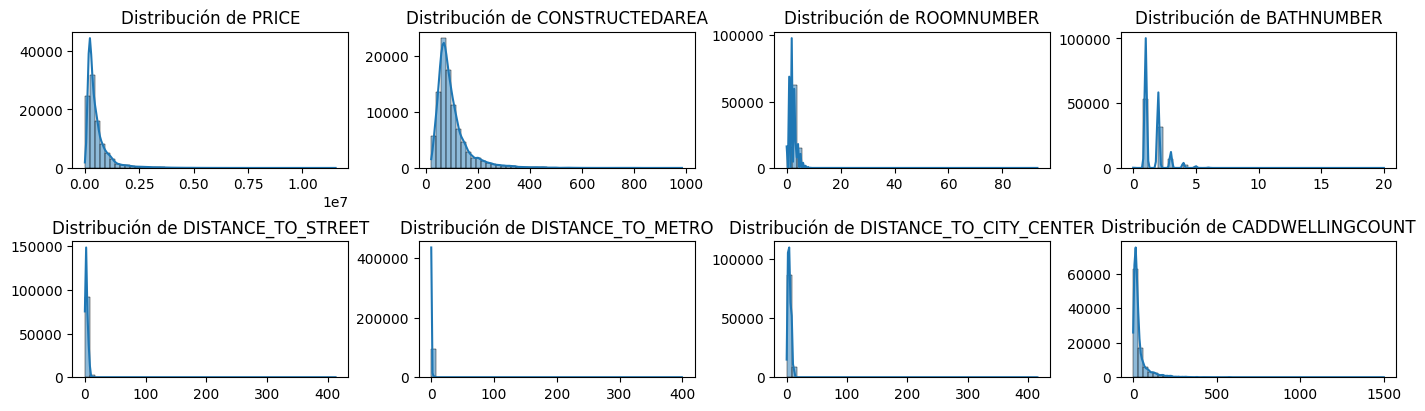

In [ ]:
variables = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "DISTANCE_TO_STREET",
             "DISTANCE_TO_METRO", "DISTANCE_TO_CITY_CENTER", "CADDWELLINGCOUNT"]

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=mad, x=var, kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

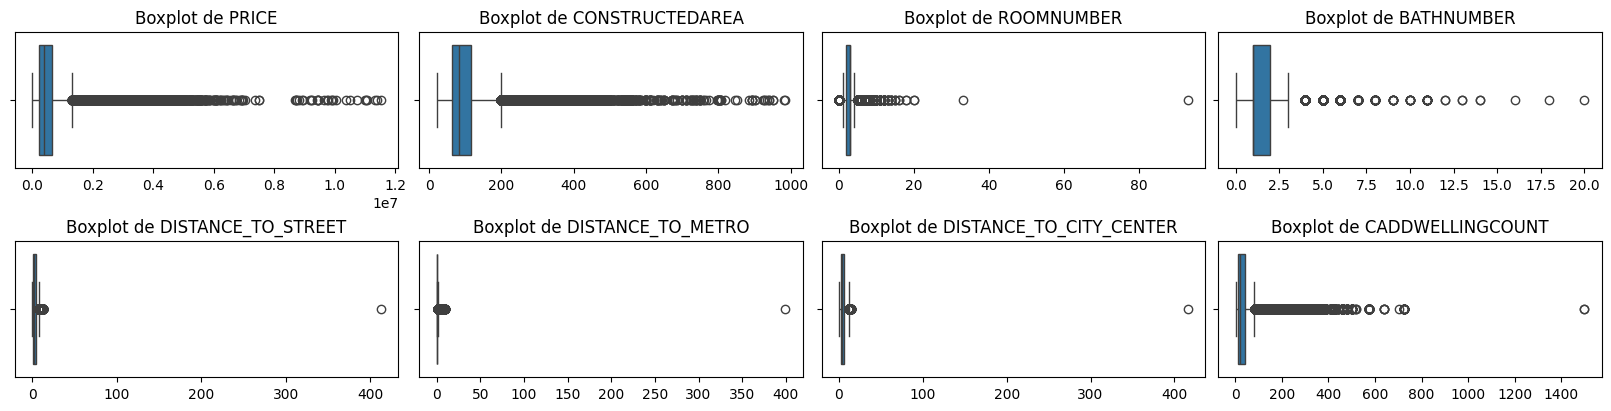

In [ ]:
variables = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "DISTANCE_TO_STREET",
             "DISTANCE_TO_METRO", "DISTANCE_TO_CITY_CENTER", "CADDWELLINGCOUNT"]

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=mad, x=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


## IQR

In [ ]:
q1 = mad["CONSTRUCTEDAREA"].quantile(0.25)
q3 = mad["CONSTRUCTEDAREA"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 2.5 * iqr

mad = mad[(mad["CONSTRUCTEDAREA"] >= lower_bound) & (mad["CONSTRUCTEDAREA"] <= upper_bound)]

print(f"Número de registros después de eliminar atípicos: {len(mad)}")

Número de registros después de eliminar atípicos: 91516


In [ ]:
q1 = mad["ROOMNUMBER"].quantile(0.25)
q3 = mad["ROOMNUMBER"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 2.5 * iqr

mad = mad[(mad["ROOMNUMBER"] >= lower_bound) & (mad["ROOMNUMBER"] <= upper_bound)]

print(f"Número de registros después de eliminar atípicos: {len(mad)}")

Número de registros después de eliminar atípicos: 90941


In [ ]:
q1 = mad["BATHNUMBER"].quantile(0.25)
q3 = mad["BATHNUMBER"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 2.5 * iqr

mad = mad[(mad["BATHNUMBER"] >= lower_bound) & (mad["BATHNUMBER"] <= upper_bound)]

print(f"Número de registros después de eliminar atípicos: {len(mad)}")


Número de registros después de eliminar atípicos: 90766


In [ ]:
q1 = mad["DISTANCE_TO_STREET"].quantile(0.25)
q3 = mad["DISTANCE_TO_STREET"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 2.5 * iqr

mad = mad[(mad["DISTANCE_TO_STREET"] >= lower_bound) & (mad["DISTANCE_TO_STREET"] <= upper_bound)]

print(f"Número de registros después de eliminar atípicos: {len(mad)}")

Número de registros después de eliminar atípicos: 90352


In [ ]:
mad = mad[mad["CADDWELLINGCOUNT"] <= 500 ]

print(f"Número de registros después de eliminar atípicos: {len(mad)}")

Número de registros después de eliminar atípicos: 90242


## Después eliminacion outliers

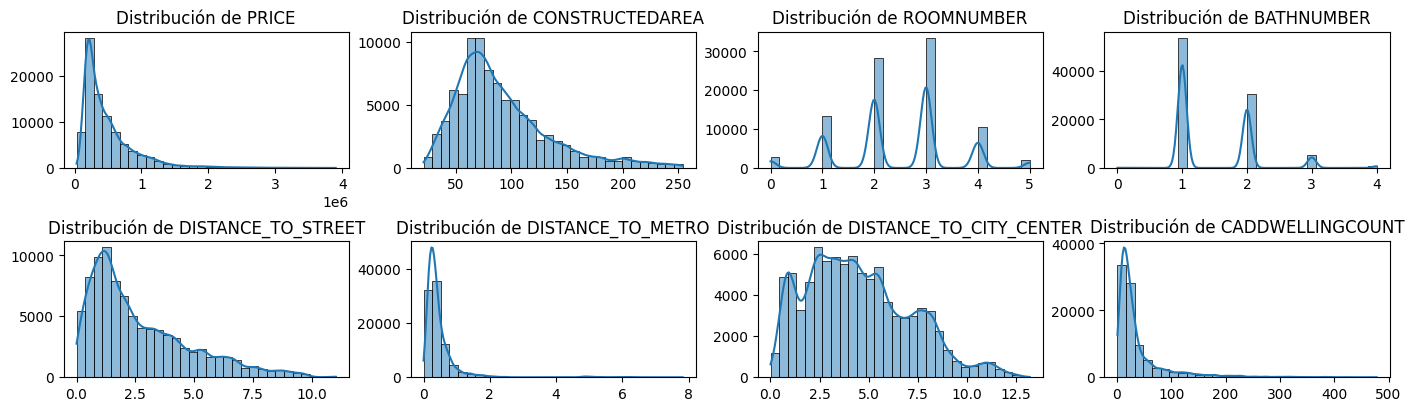

In [ ]:
variables = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "DISTANCE_TO_STREET",
             "DISTANCE_TO_METRO", "DISTANCE_TO_CITY_CENTER", "CADDWELLINGCOUNT"]

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(data=mad, x=var, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

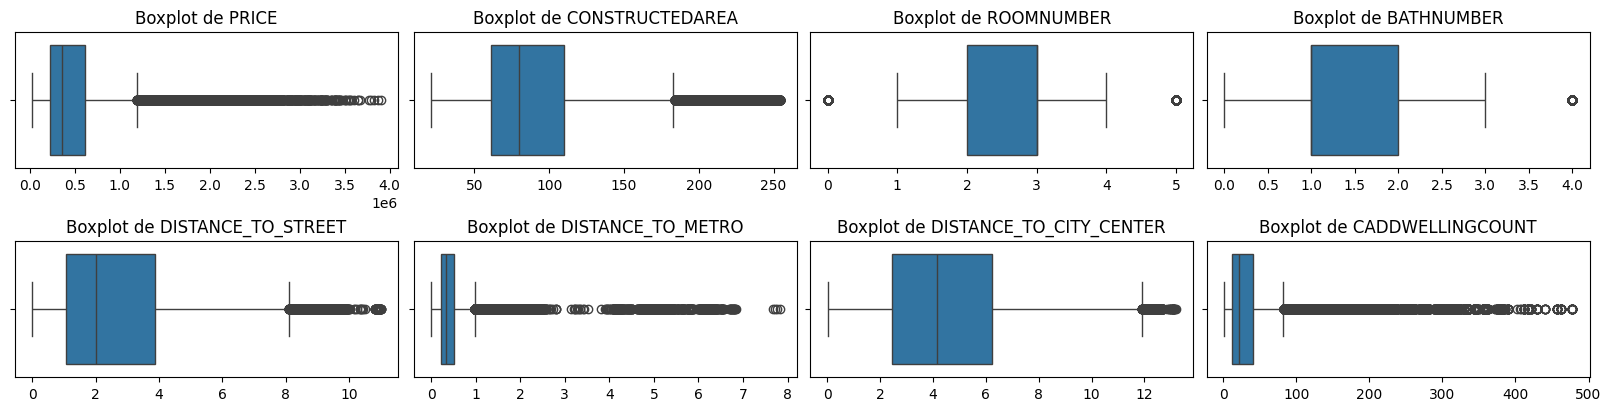

In [ ]:
variables = ["PRICE", "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "DISTANCE_TO_STREET",
             "DISTANCE_TO_METRO", "DISTANCE_TO_CITY_CENTER", "CADDWELLINGCOUNT"]

num_cols = 4
num_rows = (len(variables) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=mad, x=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Resultados

In [ ]:
mad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90242 entries, 0 to 94814
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRICE                    90242 non-null  int64  
 1   CONSTRUCTEDAREA          90242 non-null  int64  
 2   ROOMNUMBER               90242 non-null  int64  
 3   BATHNUMBER               90242 non-null  int64  
 4   HASTERRACE               90242 non-null  int64  
 5   HASLIFT                  90242 non-null  int64  
 6   HASAIRCONDITIONING       90242 non-null  int64  
 7   HASPARKINGSPACE          90242 non-null  int64  
 8   HASNORTHORIENTATION      90242 non-null  int64  
 9   HASSOUTHORIENTATION      90242 non-null  int64  
 10  HASEASTORIENTATION       90242 non-null  int64  
 11  HASWESTORIENTATION       90242 non-null  int64  
 12  HASBOXROOM               90242 non-null  int64  
 13  HASWARDROBE              90242 non-null  int64  
 14  HASSWIMMINGPOOL          90

In [ ]:
print(mad.describe())

              PRICE  CONSTRUCTEDAREA    ROOMNUMBER    BATHNUMBER  \
count  9.024200e+04     90242.000000  90242.000000  90242.000000   
mean   4.891166e+05        91.399614      2.464717      1.486038   
std    4.010490e+05        43.180366      1.046932      0.656818   
min    3.001500e+04        21.000000      0.000000      0.000000   
25%    2.224710e+05        61.000000      2.000000      1.000000   
50%    3.574740e+05        80.000000      3.000000      1.000000   
75%    6.124490e+05       110.000000      3.000000      2.000000   
max    3.901962e+06       254.000000      5.000000      4.000000   

         HASTERRACE       HASLIFT  HASAIRCONDITIONING  HASPARKINGSPACE  \
count  90242.000000  90242.000000        90242.000000     90242.000000   
mean       0.347288      0.684271            0.445591         0.211409   
std        0.476111      0.464808            0.497034         0.408310   
min        0.000000      0.000000            0.000000         0.000000   
25%        0.0000

In [ ]:
mad.isnull().sum()

,0
PRICE,0
CONSTRUCTEDAREA,0
ROOMNUMBER,0
BATHNUMBER,0
HASTERRACE,0
HASLIFT,0
HASAIRCONDITIONING,0
HASPARKINGSPACE,0
HASNORTHORIENTATION,0
HASSOUTHORIENTATION,0


In [ ]:
mad = mad.dropna(subset=['CADASTRALQUALITYID'])


In [ ]:
mad

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,2005,7,319,3.0,0,1,0,8.058429,0.872075,6.868677,54.0
1,321621,54,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1900,5,11,3.0,0,0,1,0.876369,0.116382,1.544125,83.0
2,510488,75,2,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1915,6,26,3.0,0,0,1,0.907479,0.139109,1.608444,83.0
3,388682,48,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1947,9,15,5.0,0,0,1,0.845462,0.144299,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1930,5,19,7.0,0,0,1,1.250231,0.337098,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,449781,115,3,2,1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,2009,7,58,3.0,0,0,1,10.003059,0.866826,8.276950,52.0
94811,403118,93,2,2,0,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,2007,7,161,3.0,0,0,1,10.198147,1.019788,8.496364,52.0
94812,443300,121,2,2,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,2009,6,107,3.0,0,0,1,11.204027,1.883650,9.573127,52.0
94813,189245,62,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1970,4,17,5.0,0,0,1,8.780692,0.171736,6.941217,52.0


## Correlación variables

In [ ]:
vars1 = ["CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING"] + ["PRICE"]
vars2 = ["ISSTUDIO", "HASNORTHORIENTATION", "HASSOUTHORIENTATION", "HASEASTORIENTATION", "HASWESTORIENTATION", "HASBOXROOM"] + ["PRICE"]
vars3 = ["HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN", "ISDUPLEX", "HASPARKINGSPACE"] + ["PRICE"]
vars4 = ["ISINTOPFLOOR", "CADCONSTRUCTIONYEAR", "CADMAXBUILDINGFLOOR", "CADDWELLINGCOUNT", "CADASTRALQUALITYID", "BUILTTYPEID_1"] + ["PRICE"]
vars5 = ["BUILTTYPEID_2", "BUILTTYPEID_3", "DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO", "DISTANCE_TO_STREET", "BARRIO_NUM"] + ["PRICE"]

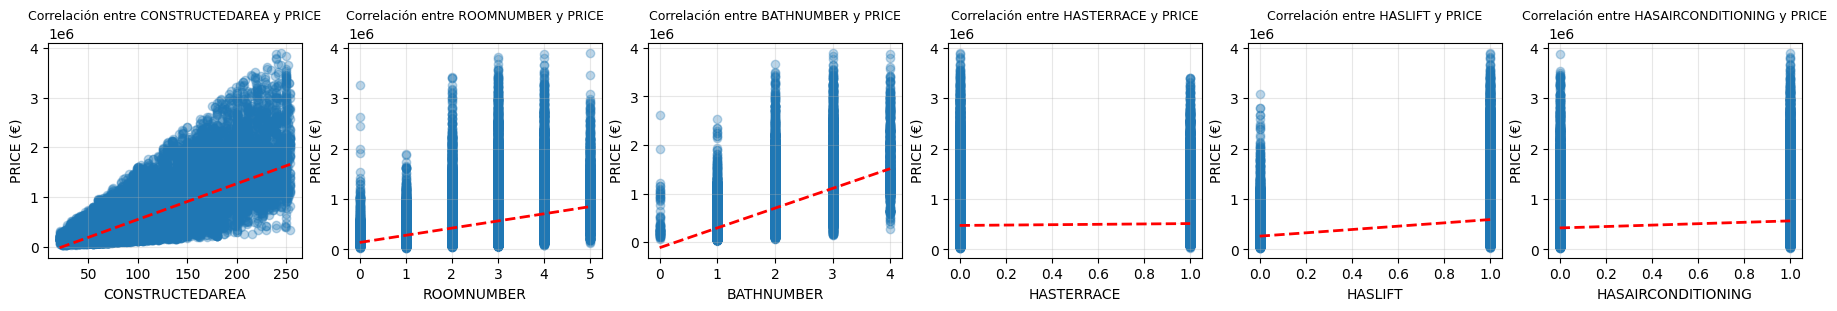

In [ ]:
variables_to_plot = [var for var in vars1 if var != "PRICE"]

num_cols = 6
num_rows = (len(variables_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    sns.regplot(
        data=mad, x=var, y="PRICE",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
        ax=axes[i]
    )
    axes[i].set_title(f"Correlación entre {var} y PRICE", fontsize=9)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("PRICE (€)", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [ ]:
variables_to_plot = [var for var in vars2 if var != "PRICE"]

num_cols = 6
num_rows = (len(variables_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    sns.regplot(
        data=mad, x=var, y="PRICE",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
        ax=axes[i]
    )
    axes[i].set_title(f"Correlación entre {var} y PRICE", fontsize=8)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("PRICE (€)", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

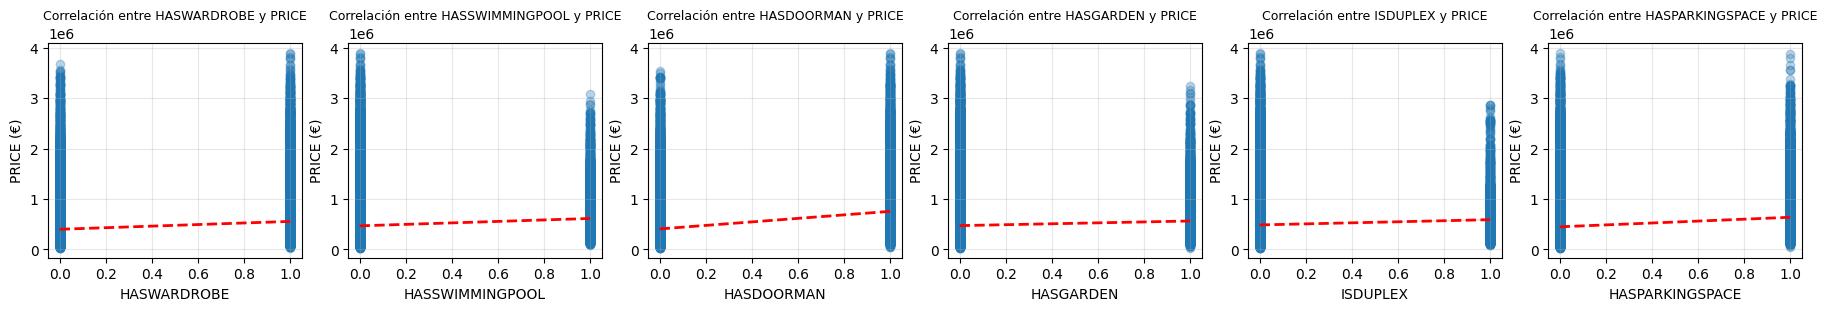

In [ ]:
variables_to_plot = [var for var in vars3 if var != "PRICE"]

num_cols = 6
num_rows = (len(variables_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    sns.regplot(
        data=mad, x=var, y="PRICE",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
        ax=axes[i]
    )
    axes[i].set_title(f"Correlación entre {var} y PRICE", fontsize=9)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("PRICE (€)", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [ ]:
variables_to_plot = [var for var in vars4 if var != "PRICE"]

num_cols = 6
num_rows = (len(variables_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    sns.regplot(
        data=mad, x=var, y="PRICE",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
        ax=axes[i]
    )
    axes[i].set_title(f"Correlación entre {var} y PRICE", fontsize=8)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("PRICE (€)", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [ ]:
variables_to_plot = [var for var in vars5 if var != "PRICE"]

num_cols = 6
num_rows = (len(variables_to_plot) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 3), constrained_layout=True)

axes = axes.flatten()

for i, var in enumerate(variables_to_plot):
    sns.regplot(
        data=mad, x=var, y="PRICE",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
        ax=axes[i]
    )
    axes[i].set_title(f"Correlación entre {var} y PRICE", fontsize=8)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel("PRICE (€)", fontsize=10)
    axes[i].grid(alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Matriz correlación

In [ ]:
vars = [
    "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING",
    "HASPARKINGSPACE", "HASNORTHORIENTATION", "HASSOUTHORIENTATION", "HASEASTORIENTATION", "HASWESTORIENTATION", "HASBOXROOM",
    "HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN", "ISDUPLEX", "ISSTUDIO",
    "ISINTOPFLOOR", "CADCONSTRUCTIONYEAR", "CADMAXBUILDINGFLOOR", "CADDWELLINGCOUNT",
    "CADASTRALQUALITYID", "BUILTTYPEID_1", "BUILTTYPEID_2", "BUILTTYPEID_3",
    "DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO", "DISTANCE_TO_STREET", "BARRIO_NUM",
]

correlations_with_price = mad[vars + ["PRICE"]].corr()["PRICE"].drop("PRICE")

print(correlations_with_price.sort_values(ascending=False))

CONSTRUCTEDAREA            0.774255
BATHNUMBER                 0.666213
BARRIO_NUM                 0.605980
HASLIFT                    0.381330
ROOMNUMBER                 0.370872
HASDOORMAN                 0.368076
CADMAXBUILDINGFLOOR        0.207667
HASWARDROBE                0.192568
HASPARKINGSPACE            0.192196
HASBOXROOM                 0.190099
HASAIRCONDITIONING         0.173151
HASSWIMMINGPOOL            0.127180
HASWESTORIENTATION         0.092389
HASGARDEN                  0.087885
HASSOUTHORIENTATION        0.072995
HASEASTORIENTATION         0.059146
HASTERRACE                 0.043973
HASNORTHORIENTATION        0.043433
CADDWELLINGCOUNT           0.040351
ISDUPLEX                   0.039680
BUILTTYPEID_1              0.037823
BUILTTYPEID_2              0.031046
ISINTOPFLOOR               0.030533
DISTANCE_TO_METRO         -0.027100
BUILTTYPEID_3             -0.044752
ISSTUDIO                  -0.085385
CADCONSTRUCTIONYEAR       -0.085605
DISTANCE_TO_CITY_CENTER   -0

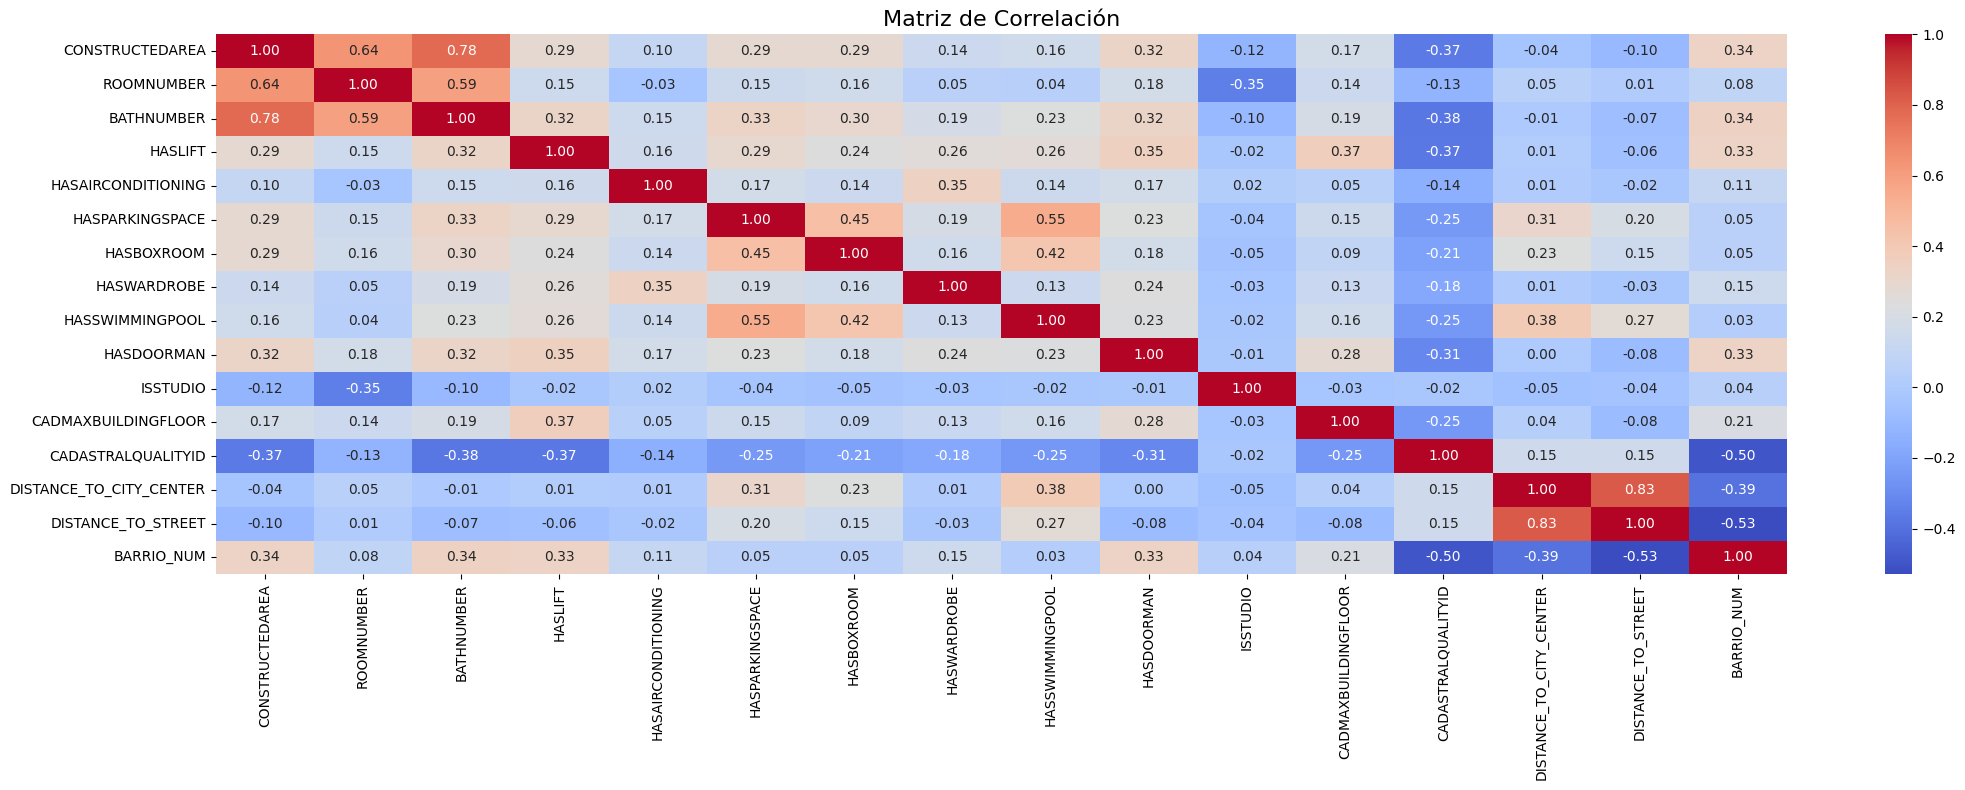

In [ ]:
vars = [
    "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "HASLIFT", "HASAIRCONDITIONING",
    "HASPARKINGSPACE", "HASBOXROOM", "HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN",
     "ISSTUDIO", "CADMAXBUILDINGFLOOR", "CADASTRALQUALITYID",
     "DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_STREET", "BARRIO_NUM"
]

correlation_matrix = mad[vars].corr()

plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Matriz de Correlación", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#Regresion y XGB
mad1 = mad.drop(['HASWESTORIENTATION','HASSOUTHORIENTATION', 'CADDWELLINGCOUNT', 'HASEASTORIENTATION', 'HASTERRACE', 'HASNORTHORIENTATION',
                 'ISDUPLEX', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'ISINTOPFLOOR', 'DISTANCE_TO_METRO', 'CADCONSTRUCTIONYEAR',
                 'HASAIRCONDITIONING', 'HASSWIMMINGPOOL', 'HASGARDEN', 'ISSTUDIO', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER',
                 'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'CADMAXBUILDINGFLOOR' ], axis = 1)

In [ ]:
mad1

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASDOORMAN,CADASTRALQUALITYID,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,3.0,6.868677,54.0
1,321621,54,1,1,0,0,3.0,1.544125,83.0
2,510488,75,2,1,0,0,3.0,1.608444,83.0
3,388682,48,1,1,1,0,5.0,1.516166,83.0
4,312041,50,0,1,0,0,7.0,1.794136,83.0
...,...,...,...,...,...,...,...,...,...
94810,449781,115,3,2,1,0,3.0,8.276950,52.0
94811,403118,93,2,2,1,0,3.0,8.496364,52.0
94812,443300,121,2,2,1,0,3.0,9.573127,52.0
94813,189245,62,3,1,0,0,5.0,6.941217,52.0


In [ ]:
vars = [
    "CONSTRUCTEDAREA", "ROOMNUMBER", "BATHNUMBER", "HASTERRACE", "HASLIFT", "HASAIRCONDITIONING",
    "HASPARKINGSPACE", "HASNORTHORIENTATION", "HASSOUTHORIENTATION", "HASEASTORIENTATION", "HASWESTORIENTATION", "HASBOXROOM",
    "HASWARDROBE", "HASSWIMMINGPOOL", "HASDOORMAN", "HASGARDEN", "ISDUPLEX", "ISSTUDIO",
    "ISINTOPFLOOR", "CADCONSTRUCTIONYEAR", "CADMAXBUILDINGFLOOR", "CADDWELLINGCOUNT",
    "CADASTRALQUALITYID", "BUILTTYPEID_1", "BUILTTYPEID_2", "BUILTTYPEID_3",
    "DISTANCE_TO_CITY_CENTER", "DISTANCE_TO_METRO", "DISTANCE_TO_STREET", "BARRIO_NUM"
]

correlations_with_price = mad[vars + ["PRICE"]].corr()["PRICE"].drop("PRICE")

print(correlations_with_price.sort_values(ascending=False))

CONSTRUCTEDAREA            0.774254
BATHNUMBER                 0.666212
BARRIO_NUM                 0.605979
HASLIFT                    0.381335
ROOMNUMBER                 0.370870
HASDOORMAN                 0.368075
CADMAXBUILDINGFLOOR        0.207663
HASWARDROBE                0.192564
HASPARKINGSPACE            0.192193
HASBOXROOM                 0.190097
HASAIRCONDITIONING         0.173147
HASSWIMMINGPOOL            0.127178
HASWESTORIENTATION         0.092387
HASGARDEN                  0.087882
HASSOUTHORIENTATION        0.072993
HASEASTORIENTATION         0.059157
HASTERRACE                 0.043980
HASNORTHORIENTATION        0.043431
CADDWELLINGCOUNT           0.040348
ISDUPLEX                   0.039679
BUILTTYPEID_1              0.037822
BUILTTYPEID_2              0.031044
ISINTOPFLOOR               0.030532
DISTANCE_TO_METRO         -0.027100
BUILTTYPEID_3             -0.044749
ISSTUDIO                  -0.085386
CADCONSTRUCTIONYEAR       -0.085597
DISTANCE_TO_CITY_CENTER   -0

In [ ]:
#Random Forest
mad2 = mad.drop(['HASWESTORIENTATION','HASSOUTHORIENTATION', 'CADDWELLINGCOUNT', 'HASEASTORIENTATION', 'HASTERRACE', 'HASNORTHORIENTATION',
                 'ISDUPLEX', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'ISINTOPFLOOR', 'DISTANCE_TO_METRO', 'CADCONSTRUCTIONYEAR', 'BUILTTYPEID_3', 'HASGARDEN'], axis = 1)

In [ ]:
mad2

,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,ISSTUDIO,CADMAXBUILDINGFLOOR,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_STREET,BARRIO_NUM
0,180848,47,1,1,1,1,0,1,1,1,1,0,7,3.0,8.058429,6.868677,54.0
1,321621,54,1,1,0,0,0,0,1,0,0,0,5,3.0,0.876369,1.544125,83.0
2,510488,75,2,1,0,1,0,1,1,0,0,0,6,3.0,0.907479,1.608444,83.0
3,388682,48,1,1,1,1,0,0,0,0,0,0,9,5.0,0.845462,1.516166,83.0
4,312041,50,0,1,0,0,0,0,0,0,0,1,5,7.0,1.250231,1.794136,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,449781,115,3,2,1,1,1,1,1,1,0,0,7,3.0,10.003059,8.276950,52.0
94811,403118,93,2,2,1,1,1,1,1,1,0,0,7,3.0,10.198147,8.496364,52.0
94812,443300,121,2,2,1,1,1,1,1,1,0,0,6,3.0,11.204027,9.573127,52.0
94813,189245,62,3,1,0,0,0,0,1,0,0,0,4,5.0,8.780692,6.941217,52.0
